In [169]:
import numpy as np
import pandas as pd
df=pd.read_csv('weather.csv')
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy


In [170]:
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [171]:
df.tail()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
13195,10.0,74,14.5,71.0,overcast,1003.15,1,Summer,1.0,mountain,Rainy
13196,-1.0,76,3.5,23.0,cloudy,1067.23,1,Winter,6.0,coastal,Snowy
13197,30.0,77,5.5,28.0,overcast,1012.69,3,Autumn,9.0,coastal,Cloudy
13198,3.0,76,10.0,94.0,overcast,984.27,0,Winter,2.0,inland,Snowy
13199,-5.0,38,0.0,92.0,overcast,1015.37,5,Autumn,10.0,mountain,Rainy


In [172]:
df.columns

Index(['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)',
       'Cloud Cover', 'Atmospheric Pressure', 'UV Index', 'Season',
       'Visibility (km)', 'Location', 'Weather Type'],
      dtype='object')

In [173]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover              object
Atmospheric Pressure    float64
UV Index                  int64
Season                   object
Visibility (km)         float64
Location                 object
Weather Type             object
dtype: object

In [174]:
df.isna().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

In [175]:
df.shape

(13200, 11)

In [176]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [177]:
df['Season'].value_counts()

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

In [178]:
from sklearn.preprocessing import LabelEncoder
lab=LabelEncoder()
df['Cloud Cover']=lab.fit_transform(df['Cloud Cover'])
df['Season']=lab.fit_transform(df['Season'])
df['Location']=lab.fit_transform(df['Location'])



In [179]:
df.dtypes

Temperature             float64
Humidity                  int64
Wind Speed              float64
Precipitation (%)       float64
Cloud Cover               int64
Atmospheric Pressure    float64
UV Index                  int64
Season                    int64
Visibility (km)         float64
Location                  int64
Weather Type             object
dtype: object

In [180]:
df['Weather Type'].value_counts()

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64

In [181]:
x=df.iloc[:,:-1].values
x

array([[14. , 73. ,  9.5, ...,  3. ,  3.5,  1. ],
       [39. , 96. ,  8.5, ...,  1. , 10. ,  1. ],
       [30. , 64. ,  7. , ...,  1. ,  5.5,  2. ],
       ...,
       [30. , 77. ,  5.5, ...,  0. ,  9. ,  0. ],
       [ 3. , 76. , 10. , ...,  3. ,  2. ,  1. ],
       [-5. , 38. ,  0. , ...,  0. , 10. ,  2. ]], shape=(13200, 10))

In [182]:
y=df.iloc[:,-1].values
y

array(['Rainy', 'Cloudy', 'Sunny', ..., 'Cloudy', 'Snowy', 'Rainy'],
      shape=(13200,), dtype=object)

In [183]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=1)


In [184]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
scalar.fit(x_train)
x_train=scalar.transform(x_train)
x_test=scalar.transform(x_test)

In [185]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,ConfusionMatrixDisplay
knn=KNeighborsClassifier(n_neighbors=7)
nav=BernoulliNB()
sup=SVC()
lst=[knn,nav,sup]

In [186]:
lsst=[]
for i in y_train:
    if i not in lsst:
        lsst.append(i)
lsst


['Sunny', 'Rainy', 'Cloudy', 'Snowy']

<<<<< accuracy_score of  KNeighborsClassifier(n_neighbors=7) >>>>>
0.8964646464646465
<<<<< confusion_matrix of  KNeighborsClassifier(n_neighbors=7) >>>>>
[[876  86  13  21]
 [ 54 896  33  23]
 [ 30  22 914  24]
 [ 63  31  10 864]]
<<<<< ConfusionMatrixDisplay of  KNeighborsClassifier(n_neighbors=7) >>>>>
<<<<< classification_report of  KNeighborsClassifier(n_neighbors=7) >>>>>
              precision    recall  f1-score   support

      Cloudy       0.86      0.88      0.87       996
       Rainy       0.87      0.89      0.88      1006
       Snowy       0.94      0.92      0.93       990
       Sunny       0.93      0.89      0.91       968

    accuracy                           0.90      3960
   macro avg       0.90      0.90      0.90      3960
weighted avg       0.90      0.90      0.90      3960

----------------------------------------------------------------------------------------------------
<<<<< accuracy_score of  BernoulliNB() >>>>>
0.8590909090909091
<<<<< confusion_mat

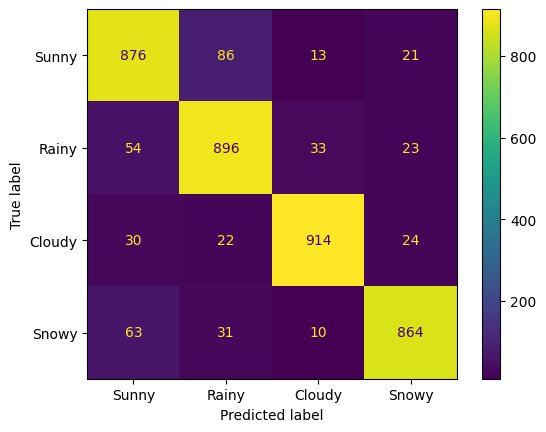

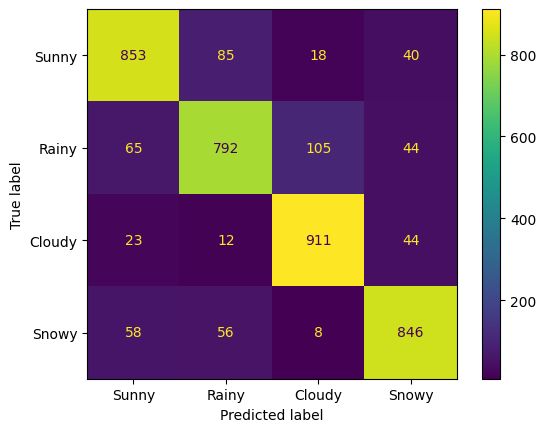

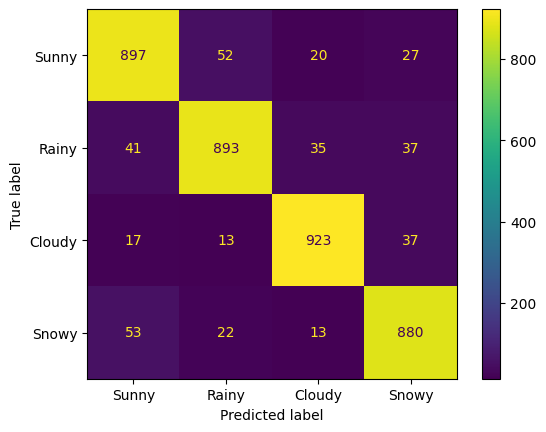

In [187]:
label=['Sunny', 'Rainy', 'Cloudy', 'Snowy']
for i in lst:
    i.fit(x_train,y_train)
    y_pred=i.predict(x_test)
    print('<<<<< accuracy_score of ',i,'>>>>>')
    print(accuracy_score(y_test,y_pred))
    print('<<<<< confusion_matrix of ',i,'>>>>>')
    cm=confusion_matrix(y_test,y_pred)
    print(cm)
    print('<<<<< ConfusionMatrixDisplay of ',i,'>>>>>')
    cmd=ConfusionMatrixDisplay(cm,display_labels=label)
    cmd.plot()
    print('<<<<< classification_report of ',i,'>>>>>')
    print(classification_report(y_test,y_pred))

    print('-'*100)


In [188]:
df

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,Rainy
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,Cloudy
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,Sunny
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,Sunny
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,Rainy
...,...,...,...,...,...,...,...,...,...,...,...
13195,10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2,Rainy
13196,-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0,Snowy
13197,30.0,77,5.5,28.0,2,1012.69,3,0,9.0,0,Cloudy
13198,3.0,76,10.0,94.0,2,984.27,0,3,2.0,1,Snowy


In [189]:
print(knn.predict(scalar.transform([[10.0,74,14.5,71.0,2,1003.15,1,2,1.0,2]])))

['Rainy']


In [191]:
print(sup.predict(scalar.transform([[-1.0,76,3.5,23.0,1,1067.23,1,3,6.0,0]])))

['Cloudy']
